In [38]:
# Set which gpu to use
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = '1'

# from vrae.vrae import VRAE
# from vrae.utils import *
from vrae.utils_VAE import *
from vrae.utils_GMM import *
import numpy as np
# import torch
import pickle
from annotation_parsers import dump_labels_bento


from hmmlearn import hmm
# from sklearn.decomposition import PCA, TruncatedSVD
# from sklearn.manifold import TSNE

# import plotly
# from torch.utils.data import DataLoader, TensorDataset
# plotly.offline.init_notebook_mode()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
training_file = ['20201020_Pop_Cage_001','20201020_Pop_Cage_002','20201020_Pop_Cage_003', '20201020_Pop_Cage_004', 
                 '20201020_Pop_Cage_005', '20201020_Pop_Cage_006', '20201020_Pop_Cage_007']

X_all = []
y_all = []
length_all = []
for ii in training_file:
    X, y = load_data(direc = 'data', dataset="EMG", all_file = [ii], trim = False)
#     print(X.shape)
    X = X[::2]
    y = y[::2]
    X = X.reshape(-1, 15)
#     print(X.shape)
    X_all.append(X)
    y_all.append(np.repeat(y, 10))
    length_all.append(X.shape[0])
X_all = np.concatenate(X_all, axis = 0)
y_all = np.concatenate(y_all, axis = 0)
print(X_all.shape, y_all.shape, length_all)

# X_test = []
# length_test = []
# for ii in testing_file:
#     X, y = load_data(direc = 'data', dataset="EMG", all_file = [ii], trim = False)
# #     print(X.shape)
#     X = X[::2]
#     y = y[::2]
#     X = X.reshape(-1, 15)
# #     print(X.shape)
#     X_test.append(X)
#     length_test.append(X.shape[0])
# X_test = np.concatenate(X_test, axis = 0)
# print(X_test.shape, length_test)

Loading 20201020_Pop_Cage_001, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.], shape: (3599, 1)
Loading 20201020_Pop_Cage_002, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.], shape: (3599, 1)
Loading 20201020_Pop_Cage_003, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.  4.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.  4.], shape: (3599, 1)
Loading 20201020_Pop_Cage_004, X shape (3601, 150, 1), y shape (3601, 1), has label [-1.  0.  1.  2.  3.  4.]
Dataset shape: (3601, 10, 15)
Label: [-1.  0.  1.  2.  3.  4.], shape: (3601, 1)
Loading 20201020_Pop_Cage_005, X shape (3599, 150, 1), y shape (3599, 1), has label [-1.  0.  1.  2.  3.  5.]
Dataset shape: (3599, 10, 15)
Label: [-1.  0.  1.  2.  3.  5.], shape: (3599, 1)
Loading 20201020_Pop_Cage_006, X shape (3599, 150, 1), y shap

In [3]:
prob = []
for ii in range(2, 21):
    HMM = hmm.GaussianHMM(n_components=ii, covariance_type="diag", n_iter=1000)
    HMM.fit(X_all, length_all)
    logprob = HMM.score(X_test, length_test)
    prob.append(logprob)
    print(ii, logprob, np.exp(logprob))

2 -3453118.4671567394 0.0
3 -3310721.9335245537 0.0
4 -3243441.7529329807 0.0
5 -3196518.7136830776 0.0
6 -3149312.569666436 0.0
7 -3122091.526743252 0.0
8 -3105209.6287337514 0.0
9 -3086842.7645189646 0.0
10 -3058484.2894628937 0.0
11 -3039414.4483253546 0.0
12 -3031977.9955091425 0.0
13 -3010953.5688294433 0.0
14 -3000104.678085714 0.0
15 -2995231.6925335443 0.0
16 -2981513.110186295 0.0
17 -2968427.425841727 0.0
18 -2955289.672913381 0.0
19 -2949563.0683658416 0.0
20 -2944672.841234664 0.0


In [4]:
for ii in range(20, 30):
    HMM = hmm.GaussianHMM(n_components=ii, covariance_type="diag", n_iter=1000)
    HMM.fit(X_all, length_all)
    logprob = HMM.score(X_test, length_test)
    print(ii, logprob, np.exp(logprob))

20 -2944673.037546149 0.0
21 -2937784.830834264 0.0
22 -2932866.277839033 0.0
23 -2919678.611472601 0.0
24 -2910207.0981108444 0.0
25 -2905699.5556348944 0.0
26 -2903186.581331673 0.0
27 -2900047.9907814125 0.0
28 -2884835.51215846 0.0
29 -2885843.3315333636 0.0


8


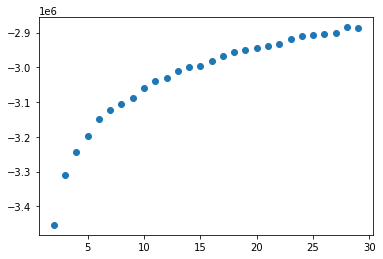

In [18]:
all_logprob = [-3453118.4671567394, -3310721.9335245537, -3243441.7529329807, -3196518.7136830776,
        -3149312.569666436, -3122091.526743252, -3105209.6287337514, -3086842.7645189646, -3058484.2894628937,
        -3039414.4483253546, -3031977.9955091425, -3010953.5688294433, -3000104.678085714, -2995231.6925335443,
        -2981513.110186295, -2968427.425841727, -2955289.672913381, -2949563.0683658416, -2944672.841234664, 
        -2937784.830834264, -2932866.277839033, -2919678.611472601, -2910207.0981108444, -2905699.5556348944, 
       -2903186.581331673, -2900047.9907814125, -2884835.51215846, -2885843.3315333636]
plt.scatter(list(range(2, 30)), all_logprob)

from kneed import KneeLocator

kneedle = KneeLocator(list(range(2, 30)), all_logprob, S=5.0, curve='concave', direction='increasing', 
                      interp_method='polynomial')
print(kneedle.knee)
# aaa = np.where(cumul_merges == kneedle.knee)[0][0]

# plt.scatter(cumul_merges, entropies)
# plt.axvline(cumul_merges[aaa])
# print(aaa)

In [59]:
HMM = hmm.GaussianHMM(n_components=6, covariance_type="diag", n_iter=1000)
HMM.fit(X_all, length_all)
logprob, state_sequence = HMM.decode(X_all, length_all)
print(logprob, np.exp(logprob))

-7316912.985017007 0.0


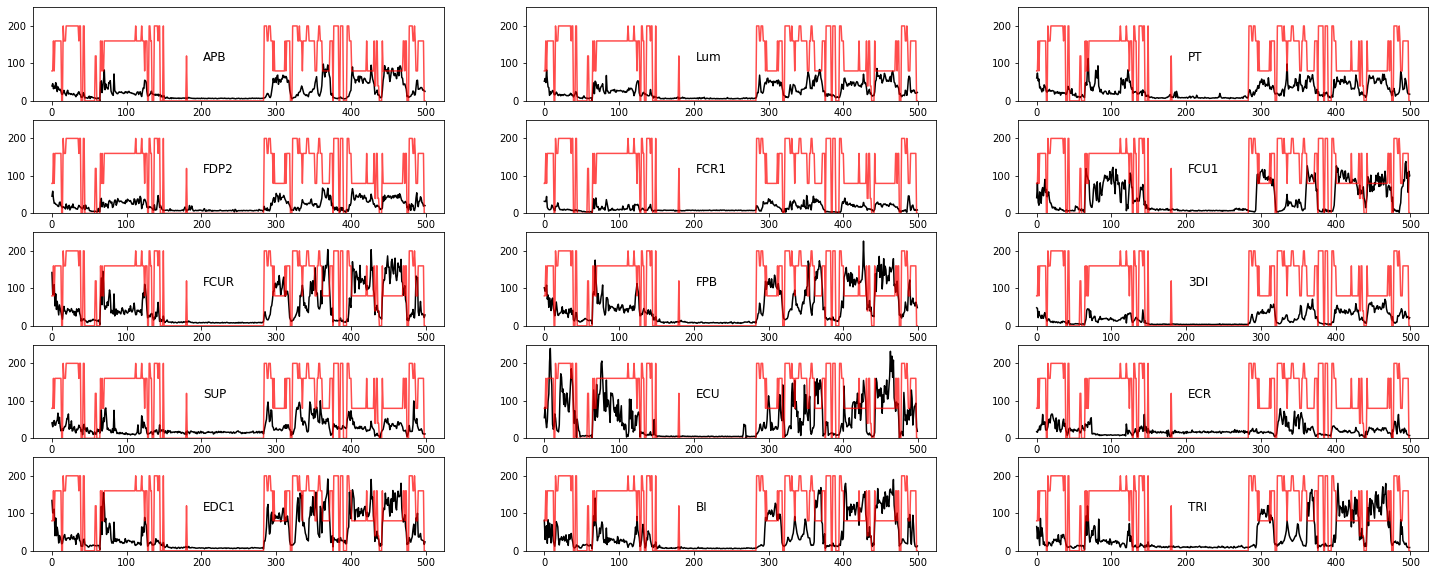

In [79]:
muscles = ['APB', 'Lum', 'PT', 'FDP2', 'FCR1', 'FCU1', 'FCUR', 'FPB', '3DI', 'SUP', 'ECU', 'ECR', 'EDC1', 'BI', 'TRI']

fig, axs = plt.subplots(5, 3, figsize=(25,10))
X = X_all.reshape(-1, 15)[5500:6000, :]
# reconstruction = reconstruction.reshape(-1, 15)[xlim[0]:xlim[1], :]

for ii in range(15):
    loc = [ii//3, ii%3]
    axs[loc[0], loc[1]].plot(X[:, ii], color = 'k', label = 'Ori')
    axs[loc[0], loc[1]].plot(state_sequence[5500:6000]*40, color = 'r', alpha = 0.7)
    axs[loc[0], loc[1]].set_xticks(np.arange(0, len(X[:, ii])+1, 100))
    axs[loc[0], loc[1]].annotate(muscles[ii], xy=(170, 50), xycoords='axes points',
            size=12, ha='left', va='top')
    axs[loc[0], loc[1]].set_ylim([0, 250])

In [27]:
bhvs = {'no_behavior': np.array([-1]), 
        'crawling': np.array([0]),
        'high picking treats': np.array([1]),
        'low picking treats': np.array([2]),
        'pg': np.array([3]),
        'sitting still': np.array([4]),
        'grooming': np.array([5])}

inv_bhvs = {int(v): k for k, v in bhvs.items()}

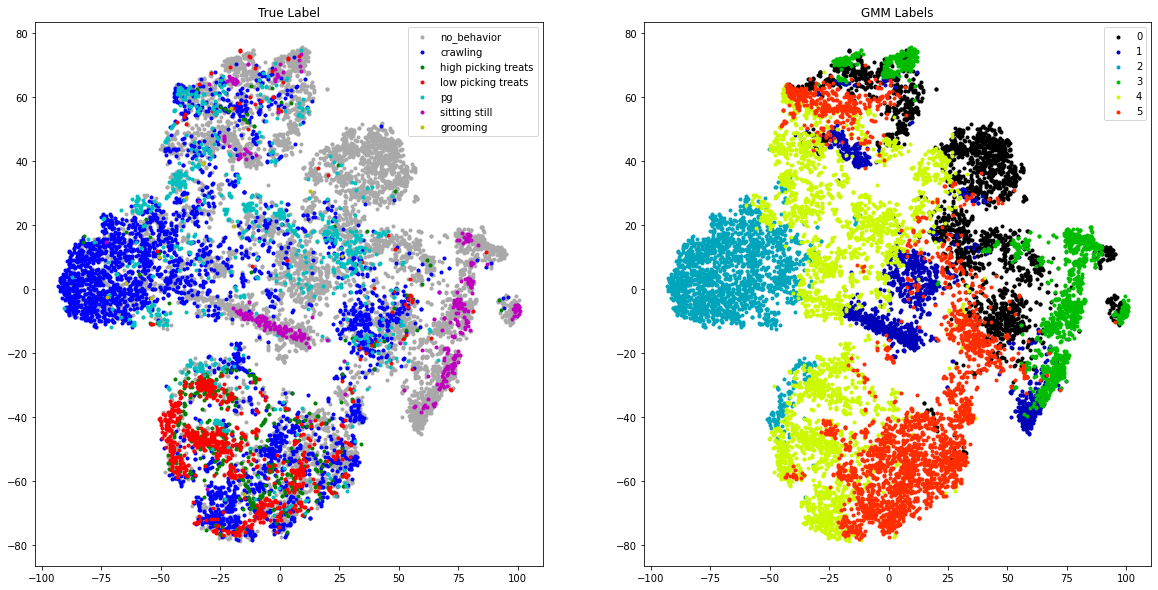

In [64]:
compare_label_tSNE(X_all, y_all, inv_bhvs, 'True Label', state_sequence, None, 'GMM Labels',
                       one_in = 10, perplexity=80, n_iter=3000)

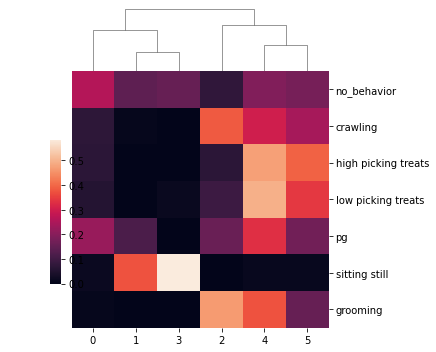

In [65]:
plot_confusion_matrix(y_all, state_sequence, bhvs.keys(), figsize = (5,5), sum_by='row')

In [63]:
with open (dload+'hmm_state', 'wb') as fh:
    pickle.dump([y_all, state_sequence], fh)

In [44]:
annot_label = state_sequence

all_length = [0, 18000, 18000, 18000, 18010, 18000, 18000, 18000]
seg = np.cumsum(all_length)

all_label = annot_label.reshape(annot_label.shape[0])

seg_label = []

for ii in range(7):
    seg_label.append(all_label[seg[ii]: seg[ii+1]])

for jj in seg_label:
    print(np.unique(jj), len(jj))

[0 1 2 3 4] 18000
[0 1 2 3 4] 18000
[0 1 2 3 4] 18000
[0 1 2 3 4] 18010
[0 1 2 3 4] 18000
[0 1 2 3 4] 18000
[0 1 2 3 4] 18000


In [45]:
for ii in range(5):
    print(f'\'cluster{ii}\', ' , end = '')

'cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 

In [46]:
beh_list = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']
all_moviename =['Pop_20201020_cage_C3_01.avi', 'Pop_20201020_cage_C3_02.avi', 'Pop_20201020_cage_C3_03.avi', 'Pop_20201020_cage_C3_04.avi', 'Pop_20201020_cage_C3_05.avi', 'Pop_20201020_cage_C3_06.avi', 'Pop_20201020_cage_C3_07.avi']

In [48]:
from collections import Counter

for ii in range(7):
#     start = time[ii]
#     end = time[ii+1]
            
    curr_label = seg_label[ii]
#     print(Counter(curr_label))
#     curr_label = np.repeat(curr_label, 10)
    filename = '/home/roton2/ruize/annotation/hmm_label_'+all_moviename[ii][:-4]+'.annot'
    dump_labels_bento(curr_label, filename, all_moviename[ii], 20, beh_list)

In [56]:
dload = './model_dir'
with open(dload+'/test', 'rb') as fh:
    infomap_label = pickle.load(fh)
infomap_label = np.repeat(infomap_label[::2], 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

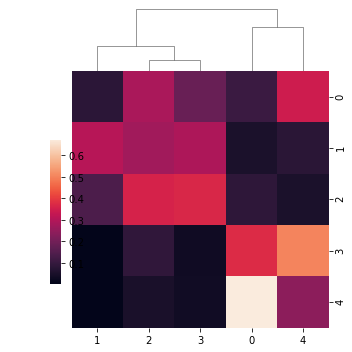

In [58]:
plot_confusion_matrix(infomap_label, state_sequence[:125920], None, figsize = (5,5), sum_by='row')